In [1]:
# Importimg libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Data set

In [2]:
books=pd.read_csv('Books.csv')

In [3]:
ratings=pd.read_csv('Ratings.csv')

In [4]:
users=pd.read_csv('Users.csv')

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.shape

(271360, 8)

In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
ratings.shape

(1149780, 3)

In [9]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
users.shape

(278858, 3)

### Books data set

In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [12]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [13]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [14]:
# as we see in above there is one null value in book-author, 2 null values in publisher and 3 null values in Image-url-L

In [15]:
#lets check the missing value percentage
print((books.isnull().sum()/len(books))*100)

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000369
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
dtype: float64


In [16]:
#null values in book author very first
books[books["Book-Author"].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [17]:
#filling the null values
books.loc[187689,'Book-Author']='Larissa Anne Downes'

In [18]:
#let check the null value in publisher
books[books["Publisher"].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [19]:
# replacing null values
books.loc[128890,'Publisher']="Mundania Press"
books.loc[129037,'Publisher']="Hoodder & Stoughton"


In [20]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [21]:
# as we see in output there are some years as 0,2030,2037,DK Publishing Inc,Gallimard

In [22]:
#correcting this year
books[books["Year-Of-Publication"]=="DK Publishing Inc"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [23]:
# correcting values for row 209538 and 221678
books.loc[books.ISBN=='078946697X',"Book-Title"]="DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
books.loc[books.ISBN=='078946697X',"Book-Author"]='Michael Teitelbaum'
books.loc[books.ISBN=='078946697X',"Year-Of-Publication"]=2000
books.loc[books.ISBN=='078946697X',"Publisher"]='DK Publishing Inc'

books.loc[books.ISBN=='0789466953',"Book-Title"]="DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
books.loc[books.ISBN=='0789466953',"Book-Author"]="James Buckley"
books.loc[books.ISBN=='0789466953',"Year-Of-Publication"]=2000
books.loc[books.ISBN=='0789466953',"Publisher"]="DK Publishing Inc"

In [24]:
books[books['Year-Of-Publication']=="Gallimard"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [25]:
#correcting values for row 220731
books.loc[books.ISBN=='2070426769',"Book-Title"]="Peuple du ciel : suivi de Les bergers"
books.loc[books.ISBN=='2070426769',"Book-Author"]="Jean-Marie Gustave"
books.loc[books.ISBN=='2070426769',"Year-Of-Publication"]=2002
books.loc[books.ISBN=='2070426769',"Publisher"]="Paris : Gallimard"

In [26]:
books.loc[books["ISBN"].isin(['078946697X','0789466953','2070426769'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,Peuple du ciel : suivi de Les bergers,Jean-Marie Gustave,2002,Paris : Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [27]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [28]:
# as we see above for Year-Of-Publication data type is shown as object

In [29]:
#changing the data type of year of publication from object to integer
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [30]:
# checking for those years of publication which are greater than 0 and at the same time which are less than 1800
books[(books["Year-Of-Publication"]>0) & (books["Year-Of-Publication"]<1800)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...


In [31]:
# changing values of wrong year of publication
books.loc[books.ISBN=='9643112136',"Year-Of-Publication"]=2010

books.loc[books.ISBN=='964442011X',"Year-Of-Publication"]=1991

In [32]:
#check for the year of publication which are after 2022
books.loc[(books['Year-Of-Publication'] > 2022) | (books['Year-Of-Publication'] == 0)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


In [33]:
# as we see above this much of rows having year of publication as 0 and greater than 2022

In [34]:
#we replacing all the value with NAN
books.loc[(books['Year-Of-Publication']>2022)|(books['Year-Of-Publication']==0)]=np.NAN

#we replace NAN values with median value of year of publication
books['Year-Of-Publication'].fillna(books['Year-Of-Publication'].median(), inplace=True)

# we are replacing with median as huge number of years are wrongly mapped we can not put them as null values, median is more trust worthy than mean so we are replacing them with median

In [35]:
books["Book-Author"].value_counts()

Agatha Christie        598
William Shakespeare    559
Stephen King           511
Ann M. Martin          423
Carolyn Keene          372
                      ... 
Robin Richmond           1
Marie Blake              1
Tzabar                   1
Kirsten A. Seaver        1
Christopher  Biffle      1
Name: Book-Author, Length: 100668, dtype: int64

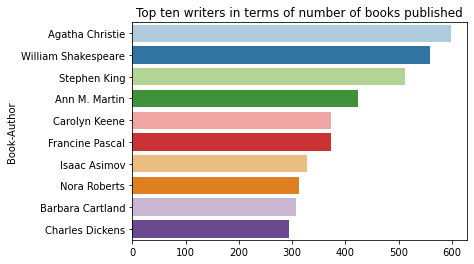

In [36]:
#Top 10 writers in terms of number of books published
popular_authors=books.groupby('Book-Author')['Book-Title'].count().nlargest(10)
sns.barplot(x=popular_authors.values,y=popular_authors.index,palette='Paired')
plt.title('Top ten writers in terms of number of books published')
plt.show()

In [37]:
books["Publisher"].value_counts()

Harlequin                         7535
Silhouette                        4220
Pocket                            3870
Ballantine Books                  3764
Bantam Books                      3642
                                  ... 
Hawaiian Service, Incorporated       1
Royal House Pub. Co.                 1
Betancourt &amp; Company             1
Vision House Pub                     1
Connaught                            1
Name: Publisher, Length: 16397, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

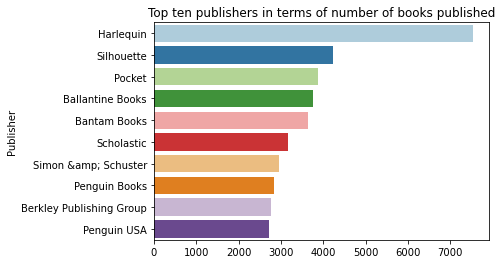

In [38]:
#Publishers with the most number of books published
popular_publishers=books.groupby('Publisher')['Book-Title'].count().nlargest(10)
sns.barplot(x=popular_publishers.values,y=popular_publishers.index,palette='Paired')
plt.title('Top ten publishers in terms of number of books published')
plt.show

In [39]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [40]:
#Checking missing values in publisher columns
books["Publisher"].isnull().sum()

4631

In [41]:
#uppercase the ISBN Numbers as jupiter notebook is very case sensitive if there are same alphabets in small and capital it will consider them as different 
books["ISBN"]=books["ISBN"].str.upper()

In [42]:
# checking for duplicate rows
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
188,NaN,NaN,NaN,1996.0,NaN,NaN,NaN,NaN
288,NaN,NaN,NaN,1996.0,NaN,NaN,NaN,NaN
351,NaN,NaN,NaN,1996.0,NaN,NaN,NaN,NaN
542,NaN,NaN,NaN,1996.0,NaN,NaN,NaN,NaN
641,NaN,NaN,NaN,1996.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
270794,NaN,NaN,NaN,1996.0,NaN,NaN,NaN,NaN
270913,NaN,NaN,NaN,1996.0,NaN,NaN,NaN,NaN
271094,NaN,NaN,NaN,1996.0,NaN,NaN,NaN,NaN
271182,NaN,NaN,NaN,1996.0,NaN,NaN,NaN,NaN


In [43]:
# Drop the rows whose entire column values are repeated
books.drop_duplicates(keep="first",inplace=True)
books.reset_index(drop=True,inplace=True)

In [44]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266424 entries, 0 to 266423
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 266423 non-null  object 
 1   Book-Title           266423 non-null  object 
 2   Book-Author          266423 non-null  object 
 3   Year-Of-Publication  266424 non-null  float64
 4   Publisher            266423 non-null  object 
 5   Image-URL-S          266423 non-null  object 
 6   Image-URL-M          266423 non-null  object 
 7   Image-URL-L          266420 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.3+ MB


### Ratings data set

In [45]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [46]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [47]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [48]:
# checking total unique values in user-Id and ISBN column 
ratings['User-ID'].nunique(),ratings['ISBN'].nunique()

(105283, 340556)

In [49]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [50]:
# uppercase the values given in ISMB column
ratings['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [51]:
ratings[ratings.duplicated()].sum()

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

In [52]:
# checking if all the books in ratings data set are also in books data set
rantings_books=ratings[ratings['ISBN'].isin(books['ISBN'])]

In [53]:
ratings.shape, rantings_books.shape

((1149780, 3), (1016567, 3))

In [54]:
rantings_books

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [55]:
rantings_books['Book-Rating'].value_counts()

0     638725
8      90303
10     70194
7      65283
9      59869
5      44719
6      31159
4       7489
3       5033
2       2333
1       1460
Name: Book-Rating, dtype: int64

In [56]:
# as we see above 90,303 users given rating 8 to the books then 70194 users given 10 rating to the books

In [57]:
rantings_books.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:5]

,ISBN,Book-Rating
212755,0971880107,2502
37880,0316666343,1295
69725,0385504209,883
7186,0060928336,732
31704,0312195516,723


In [58]:
#  this are the top 5 books for which total numbers of ratings given are highest

In [59]:
non_zero_rating = rantings_books[rantings_books['Book-Rating'] != 0]
zero_rating = rantings_books[rantings_books['Book-Rating'] == 0]

In [60]:
non_zero_rating.shape, zero_rating.shape

((377842, 3), (638725, 3))

In [61]:
rantings_books.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [62]:
# most purchased books including the zero rated books
rantings_books.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:15]['ISBN'].values

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211', '059035342X', '0316601950',
       '0375727345', '044021145X', '0452282152'], dtype=object)

In [63]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
books[books['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
118,0671027360,Angels &amp; Demons,Dan Brown,2001.0,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...
303,044023722X,A Painted House,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...
353,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...
405,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
519,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
700,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
739,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
1090,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
1890,067976402X,Snow Falling on Cedars,David Guterson,1995.0,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...


In [64]:
# most popular rated books
non_zero_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21542,0316666343,707
115939,0971880107,581
38184,0385504209,487
17670,0312195516,383
4039,0060928336,320
67801,059035342X,313
12012,0142001740,307
51035,0446672211,295
47262,044023722X,281
56821,0452282152,278


In [65]:

# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books[books['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
405,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
519,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
739,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
1090,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...


### Users Data set

In [66]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [67]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [68]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [69]:
users[users.duplicated()].sum()

User-ID     0.0
Location    0.0
Age         0.0
dtype: float64

In [70]:
#Percentage of missing values in users data set
print(users.isnull().sum()/len(users)*100)
     

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64


In [71]:
# In age column 39.72% of data  is missing

In [72]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [73]:
# as you see above 1,10,762 null values in Age column

In [74]:
users["Age"].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [75]:
# maximum age in age column is 244 this is insignificant value

<AxesSubplot:xlabel='Age'>

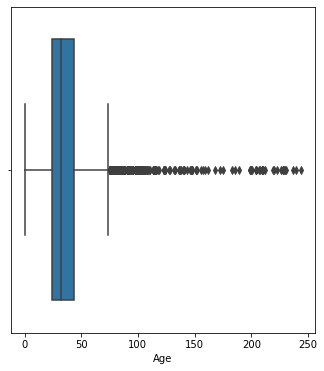

In [76]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.boxplot(x="Age",data=users)

In [77]:
# replacing all insignificant values with nan

users.loc[(users["Age"]<10)|(users["Age"]>85),"Age"]=np.nan

In [78]:
# output count gives total number of null and nan values is Age column(nan are those age which are lessa than 10 and greater than 85)
users['Age'].isnull().sum()

112283

In [79]:
users.describe()

,User-ID,Age
count,278858.00000,166575.000000
mean,139429.50000,34.747327
std,80499.51502,13.550069
min,1.00000,10.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,85.000000


In [80]:
#create a normal distribution with pd.series to fill the nan values
normal_age_series=pd.Series(np.random.normal(loc=users.Age.median(),scale=users.Age.std(),size=users[users.Age.isna()]["User-ID"].count()))

#take the absolute values in temperory age series
abs_age_series=round(np.abs(normal_age_series),0)

#sort users in such way nan values in the age in the first and reset the index to match with index of abs_age_series
users=users.sort_values('Age',na_position="first").reset_index(drop=True)
users.Age.fillna(abs_age_series,inplace=True)

In [81]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [82]:
def age_group(age):
    if age<12:
        x="children"
    elif age>=12 and age<=19:
        x="teenager"
    elif age>19 and age<35:
        x="youth"
    elif age>=35 and age<55:
        x="adult"
    else:
        x="elder"
    return x

In [83]:
users["age_group"]=users["Age"].apply(lambda x : age_group(x))

<AxesSubplot:xlabel='age_group', ylabel='count'>

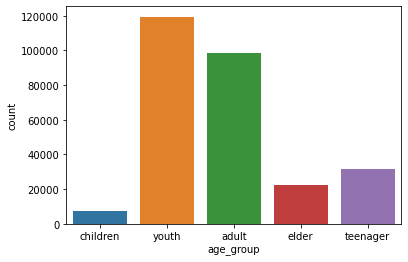

In [84]:
sns.countplot(users["age_group"])

In [85]:
users['Location'].nunique()

57339

In [86]:
users.head()

,User-ID,Location,Age,age_group
0,1,"nyc, new york, usa",9.0,children
1,3,"moscow, yukon territory, russia",32.0,youth
2,5,"farnborough, hants, united kingdom",27.0,youth
3,7,"washington, dc, usa",29.0,youth
4,8,"timmins, ontario, canada",42.0,adult


In [87]:
# fetching country names from location

for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [88]:
#Displaying the country names
set(users['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [89]:
users.loc[users['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users.loc[users['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users.loc[users['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
users.loc[users['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
users.loc[users['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users.loc[users['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users.loc[users['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)

In [90]:
#Converting the country names to uppercase
users['Country']=users['Country'].str.upper()

In [91]:
users.Country.value_counts()

USA               139746
CANADA             21658
UK                 18565
GERMANY            17074
SPAIN              13258
                   ...  
THAILOAND              1
ROSARIO                1
BURKINAFASU            1
ADSGFDR                1
SAN BERNARDINO         1
Name: Country, Length: 473, dtype: int64

In [92]:
users.head()

,User-ID,Location,Age,age_group,Country
0,1,"nyc, new york, usa",9.0,children,USA
1,3,"moscow, yukon territory, russia",32.0,youth,RUSSIA
2,5,"farnborough, hants, united kingdom",27.0,youth,UK
3,7,"washington, dc, usa",29.0,youth,USA
4,8,"timmins, ontario, canada",42.0,adult,CANADA


In [93]:
# location consists of city,state and country now we put a country column by extracting countries from location

In [94]:
#Dropping the column 'Location'
users.drop('Location',axis=1,inplace=True)

In [95]:
users.head()

,User-ID,Age,age_group,Country
0,1,9.0,children,USA
1,3,32.0,youth,RUSSIA
2,5,27.0,youth,UK
3,7,29.0,youth,USA
4,8,42.0,adult,CANADA


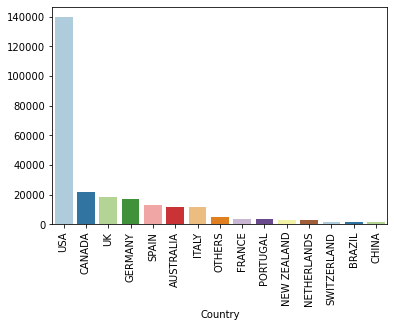

In [96]:
#Countries with maximum number of users
top10=users.groupby('Country')['User-ID'].nunique().nlargest(15)
sns.barplot(x=top10.index,y=top10.values,palette='Paired')
plt.xticks(rotation=90)
plt.show()

### Merging datasets

In [97]:
# for the rating dataset, we are only taking the non-zero rating dataset

books_rating_df = pd.merge(books, non_zero_rating, on='ISBN', how='inner')
main_dataset = pd.merge(books_rating_df, users, on='User-ID', how='inner')
     

In [98]:
main_dataset.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,age_group,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,42.0,adult,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,42.0,adult,CANADA
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,8,5,42.0,adult,CANADA
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,8,5,42.0,adult,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,8,6,42.0,adult,CANADA


In [99]:
main_dataset.shape

(377892, 13)

In [100]:
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377892 entries, 0 to 377891
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 377892 non-null  object 
 1   Book-Title           377892 non-null  object 
 2   Book-Author          377892 non-null  object 
 3   Year-Of-Publication  377892 non-null  float64
 4   Publisher            377892 non-null  object 
 5   Image-URL-S          377892 non-null  object 
 6   Image-URL-M          377892 non-null  object 
 7   Image-URL-L          377891 non-null  object 
 8   User-ID              377892 non-null  int64  
 9   Book-Rating          377892 non-null  int64  
 10  Age                  377892 non-null  float64
 11  age_group            377892 non-null  object 
 12  Country              377892 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 40.4+ MB


In [101]:
#Number of users who have rated the books
main_dataset['User-ID'].nunique()

67063

In [102]:
#Number of books in the dataframe
main_dataset['ISBN'].nunique()

146930

In [103]:
main_dataset[main_dataset.duplicated()].sum()

ISBN                   0.0
Book-Title             0.0
Book-Author            0.0
Year-Of-Publication    0.0
Publisher              0.0
Image-URL-S            0.0
Image-URL-M            0.0
Image-URL-L            0.0
User-ID                0.0
Book-Rating            0.0
Age                    0.0
age_group              0.0
Country                0.0
dtype: float64

### Exploratory Data Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'CANADA'),
  Text(2, 0, 'GERMANY'),
  Text(3, 0, 'UK'),
  Text(4, 0, 'OTHERS'),
  Text(5, 0, 'AUSTRALIA'),
  Text(6, 0, 'SPAIN'),
  Text(7, 0, 'FRANCE'),
  Text(8, 0, 'ITALY'),
  Text(9, 0, 'SWITZERLAND'),
  Text(10, 0, 'NEW ZEALAND'),
  Text(11, 0, 'NETHERLANDS'),
  Text(12, 0, 'PORTUGAL'),
  Text(13, 0, 'AUSTRIA'),
  Text(14, 0, 'MALAYSIA')])

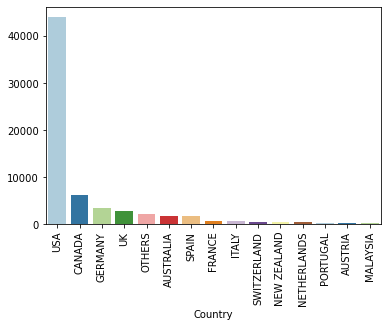

In [104]:
#Countries with maximum number of users
top10=main_dataset.groupby('Country')['User-ID'].nunique().nlargest(15)
sns.barplot(x=top10.index,y=top10.values,palette='Paired')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

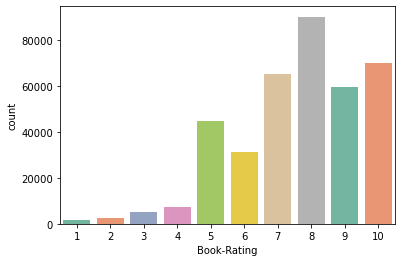

In [105]:
#Rating distribution for non zero ratings

sns.countplot(x='Book-Rating',data=main_dataset,palette='Set2')

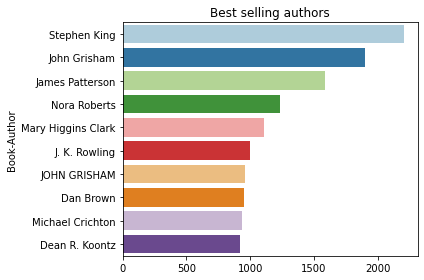

In [106]:
#Best selling authors; (we find out those authors whoes books users reads the most)
best_selling_authors=main_dataset.groupby('Book-Author')['User-ID'].nunique().nlargest(10)
sns.barplot(x=best_selling_authors.values,y=best_selling_authors.index,palette='Paired')
plt.title('Best selling authors')
plt.tight_layout()

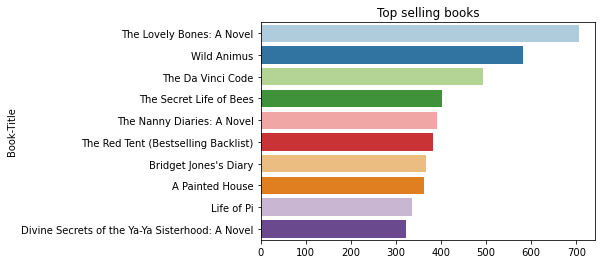

In [107]:
#Top selling books (we find out those book's title which users reads the most)
most_purchased_books=main_dataset.groupby('Book-Title')['User-ID'].nunique().nlargest(10)
sns.barplot(x=most_purchased_books.values,y=most_purchased_books.index,palette='Paired')
plt.title('Top selling books')
plt.show()

In [108]:
main_dataset.groupby('Book-Title')['User-ID'].count().nlargest(10)

Book-Title
The Lovely Bones: A Novel                           707
Wild Animus                                         581
The Da Vinci Code                                   494
The Secret Life of Bees                             406
The Nanny Diaries: A Novel                          393
The Red Tent (Bestselling Backlist)                 383
Bridget Jones's Diary                               377
A Painted House                                     365
Life of Pi                                          336
Harry Potter and the Chamber of Secrets (Book 2)    326
Name: User-ID, dtype: int64

Text(0.5, 1.0, 'Top ten writers in terms of number of books published')

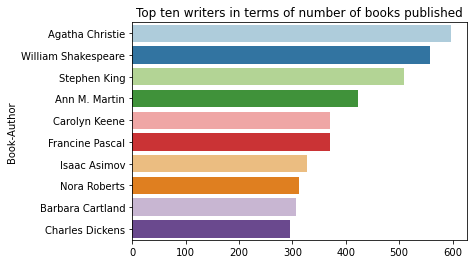

In [109]:
#Authored the most number of  books 
popular_authors=books.groupby('Book-Author')['Book-Title'].count().nlargest(10)
sns.barplot(x=popular_authors.values,y=popular_authors.index,palette='Paired')
plt.title('Top ten writers in terms of number of books published')

Text(0.5, 1.0, 'Top ten publishers in terms of number of books published')

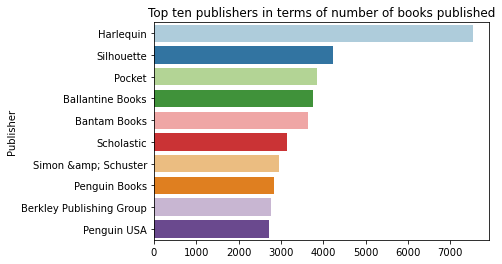

In [110]:
#Publishers with the most number of books published
popular_publishers=books.groupby('Publisher')['Book-Title'].count().nlargest(10)
sns.barplot(x=popular_publishers.values,y=popular_publishers.index,palette='Paired')
plt.title('Top ten publishers in terms of number of books published')
     

Text(0.5, 1.0, 'Top rated books')

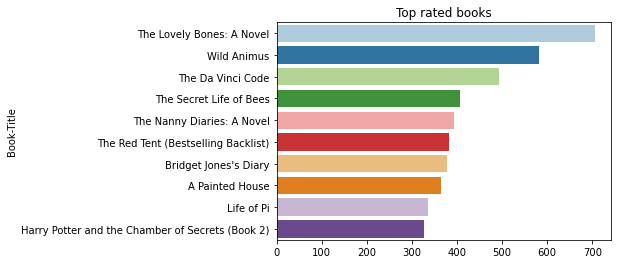

In [111]:
#Top-rated books
top_rated_books=main_dataset.groupby('Book-Title')['Book-Rating'].count().nlargest(10)
sns.barplot(x=top_rated_books.values,y=top_rated_books.index,palette='Paired')
plt.title('Top rated books')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'CANADA'),
  Text(2, 0, 'OTHERS'),
  Text(3, 0, 'UK'),
  Text(4, 0, 'GERMANY'),
  Text(5, 0, 'SPAIN'),
  Text(6, 0, 'AUSTRALIA'),
  Text(7, 0, 'FRANCE'),
  Text(8, 0, 'PORTUGAL'),
  Text(9, 0, 'MALAYSIA'),
  Text(10, 0, 'NETHERLANDS'),
  Text(11, 0, 'SWITZERLAND'),
  Text(12, 0, 'NEW ZEALAND'),
  Text(13, 0, 'ITALY'),
  Text(14, 0, 'AUSTRIA')])

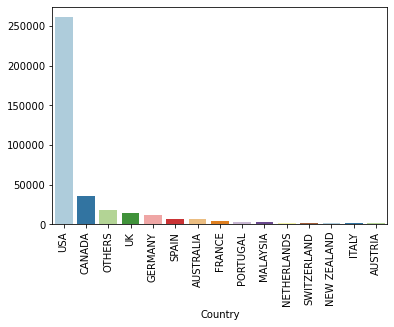

In [112]:
#Countries with maximum number of users
top10=main_dataset.groupby('Country')['Book-Rating'].count().nlargest(15)
sns.barplot(x=top10.index,y=top10.values,palette='Paired')
plt.xticks(rotation=90)

### Books having highest average ratings

In [113]:
num_rating_df=main_dataset.groupby('Book-Title').count()["Book-Rating"].reset_index()
num_rating_df.rename(columns={"Book-Rating":"Total_no_of users_rated_books"},inplace=True)
num_rating_df.head()

,Book-Title,Total_no_of users_rated_books
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2


In [114]:
avg_rating_df=main_dataset.groupby('Book-Title').mean()["Book-Rating"].reset_index()
avg_rating_df.rename(columns={"Book-Rating":"avg_rating"},inplace=True)
avg_rating_df.head()

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000


In [115]:
popular_df=num_rating_df.merge(avg_rating_df,on="Book-Title")
popular_df.head()

,Book-Title,Total_no_of users_rated_books,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000


In [116]:
# Top 10 highly rated books
popular_df=popular_df[popular_df["Total_no_of users_rated_books"]>250].sort_values("avg_rating",ascending=False).head(10)
popular_df

,Book-Title,Total_no_of users_rated_books,avg_rating
44489,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321
121629,To Kill a Mockingbird,267,8.977528
44499,Harry Potter and the Sorcerer's Stone (Harry P...,313,8.939297
44470,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491
114194,The Secret Life of Bees,406,8.477833
100739,The Da Vinci Code,494,8.439271
108243,The Lovely Bones: A Novel,707,8.185290
112961,The Red Tent (Bestselling Backlist),383,8.182768
129148,Where the Heart Is (Oprah's Book Club (Paperba...,295,8.142373
59389,Life of Pi,336,8.080357


### Listing the books which are prefered by the countries

In [117]:
country_pref=pd.DataFrame(main_dataset.groupby(['Country'])['Book-Title'].value_counts()).rename(columns={'Book-Title':'count'}).sort_values(by='count', ascending=False)
country_pref=country_pref.reset_index()
country_pref

,Country,Book-Title,count
0,USA,The Lovely Bones: A Novel,532
1,USA,The Da Vinci Code,397
2,USA,The Secret Life of Bees,363
3,USA,The Nanny Diaries: A Novel,321
4,USA,A Painted House,311
...,...,...,...
178263,OTHERS,Pickup on Noon Street,1
178264,OTHERS,Picasso at the Lapin Agile and Other Plays : P...,1
178265,OTHERS,Photographing Fairies,1
178266,OTHERS,Phoenix Without Ashes,1


In [118]:
# merge the country_pref and avg_rating_df
rated_country_df=country_pref.merge(avg_rating_df,on="Book-Title")
rated_country_df

,Country,Book-Title,count,avg_rating
0,USA,The Lovely Bones: A Novel,532,8.18529
1,CANADA,The Lovely Bones: A Novel,62,8.18529
2,OTHERS,The Lovely Bones: A Novel,42,8.18529
3,UK,The Lovely Bones: A Novel,15,8.18529
4,AUSTRALIA,The Lovely Bones: A Novel,11,8.18529
...,...,...,...,...
178263,OTHERS,Pilgrim's Inn,1,10.00000
178264,OTHERS,Piggy visits the doctor (Jim Henson's Muppet B...,1,8.00000
178265,OTHERS,Pig Tails 'n Breadfruit: A Culinary Memoir,1,10.00000
178266,OTHERS,Picture Me Cute As Can Bee (Picture Me),1,2.00000


### Listing the author names which are prefered by the countries

In [119]:
pd.DataFrame(main_dataset.groupby(['Country'])['Book-Author'].value_counts()).rename(columns={'Book-Author':'count'}).sort_values(by='count', ascending=False).reset_index()

,Country,Book-Author,count
0,USA,Stephen King,3320
1,USA,Nora Roberts,2464
2,USA,James Patterson,1923
3,USA,John Grisham,1841
4,USA,J. K. Rowling,1342
...,...,...,...
96484,OTHERS,Lance A Leventhal,1
96485,OTHERS,Lancaster,1
96486,OTHERS,Lana Wood,1
96487,OTHERS,Lamar Underwood,1


### Famous books in countries

In [120]:
#Creating List of top-10 country by book readers count
top_10_countries = main_dataset['Country'].value_counts().nlargest(10).index

#Grouping by Country and Creating dataframe for each 
grouped_dataframes = {}
for country in top_10_countries:
    grouped_dataframes[country] = main_dataset[main_dataset['Country'] == country]
    grouped_dataframes[country].reset_index(inplace=True)
    grouped_dataframes[country]['Age'].astype(int)

#Creating list of most read book for each country
book_most={}
for i in top_10_countries:
    book_most[i]=grouped_dataframes[i]['Book-Title'].value_counts().nlargest(1).index

In [121]:
for i in top_10_countries:
    print("Most read Book in ",i,' country is ',book_most[i][0],'\n')

Most read Book in  USA  country is  The Lovely Bones: A Novel 

Most read Book in  CANADA  country is  The Lovely Bones: A Novel 

Most read Book in  OTHERS  country is  The Lovely Bones: A Novel 

Most read Book in  UK  country is  Bridget Jones's Diary 

Most read Book in  GERMANY  country is  Russendisko. 

Most read Book in  SPAIN  country is  El Hobbit 

Most read Book in  AUSTRALIA  country is  Wild Animus 

Most read Book in  FRANCE  country is  Je Voudrais Que Quelqu'un M'Attende Quelque Part 

Most read Book in  PORTUGAL  country is  Coraline 

Most read Book in  MALAYSIA  country is  Life of Pi 



### Top rated books in countries

In [122]:
#Majority top reading country have same book. Enter country name of top_10_countries list and Verify value_counts of each book
grouped_dataframes['USA']['Book-Title'].value_counts()

The Lovely Bones: A Novel                                                  532
The Da Vinci Code                                                          397
The Secret Life of Bees                                                    363
The Nanny Diaries: A Novel                                                 321
A Painted House                                                            311
                                                                          ... 
Cynthia Ann Parker : The Life and Legend (Southwestern Studies, No. 92)      1
Roman Sex: 100 B.C. to A.D. 250                                              1
Stone Heart: A Novel of Sacajawea                                            1
Treasures of Tutankhamun                                                     1
Anglo-American Cataloguing Rules                                             1
Name: Book-Title, Length: 93295, dtype: int64

In [123]:
book_ratings={}
for i in top_10_countries:
    #Create Dataframe with average rating received by each book in specific country dataframe
    book_ratings[i] = grouped_dataframes[i].groupby('Book-Title')['Book-Rating'].mean().reset_index() 
    book_ratings[i].sort_values('Book-Rating') #Sort new create dataframe by rating

In [124]:
for i in top_10_countries:
    print("Highest rated Book in ",i,' country is ',book_ratings[i]['Book-Title'][0],'\n')

Highest rated Book in  USA  country is   A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America) 

Highest rated Book in  CANADA  country is   Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17) 

Highest rated Book in  OTHERS  country is  'Eine gute Frau hat keinen Kopf'. EuropÃ?Â¤ische SprichwÃ?Â¶rter Ã?Â¼ber Frauen. 

Highest rated Book in  UK  country is   Travel Companion Chile and Easter Island (Travel Companion) 

Highest rated Book in  GERMANY  country is  ' Mein verwundetes Herz'. Das Leben der Lilli Jahn 1900 - 1944. 

Highest rated Book in  SPAIN  country is  --Olivetti, Moulinex, Chaffoteaux et Maury (Quaderns crema. Narrativa) 

Highest rated Book in  AUSTRALIA  country is  ' Allo 'Allo: the War Diaries of Rene Artois 

Highest rated Book in  FRANCE  country is  1+1+1 Une RÃ?Â©volution 

Highest rated Book in  PORTUGAL  country is  $14 In The Bank (Cathy Collection) 

Highest rated Book in  MALAYSIA  country is

### Most read book by Age-Group in each country

In [125]:
'''Grouping Demography by Age
children = 0 to 11
teenager=12 to 19
youth=20 to 34
adult = 35 to 54
elder = 54 to 80'''

for i in top_10_countries:
    grouped_dataframes[i]['age_group'] = np.select(
        [grouped_dataframes[i]['Age'] < 12, (grouped_dataframes[i]['Age'] >= 13) & (grouped_dataframes[i]['Age'] <= 19),(grouped_dataframes[i]['Age'] >20) & (grouped_dataframes[i]['Age'] <= 40),(grouped_dataframes[i]['Age'] > 40) & (grouped_dataframes[i]['Age'] <= 60),grouped_dataframes[i]['Age'] > 60], 
        ['Children', 'Teen', 'youth','Middle Adulthood','elder'], default=None)

In [126]:
df_grouped_Age={}
for i in top_10_countries:
    df_grouped_Age[i] = grouped_dataframes[i].groupby('age_group')

In [127]:
for i in top_10_countries:
    print("Most read book by age_group in ",i,'is')
    print(df_grouped_Age[i]['Book-Title'].agg(pd.Series.mode),'\n\n')

Most read book by age_group in  USA is
age_group
Children            The Lovely Bones: A Novel
Middle Adulthood    The Lovely Bones: A Novel
Teen                The Lovely Bones: A Novel
elder                       The Da Vinci Code
youth               The Lovely Bones: A Novel
Name: Book-Title, dtype: object 


Most read book by age_group in  CANADA is
age_group
Children                                       Snow Falling on Cedars
Middle Adulthood                            The Lovely Bones: A Novel
Teen                [Angela's Ashes (MMP) : A Memoir, She's Come U...
elder               [A Prayer for Owen Meany, ANGELA'S ASHES, Deja...
youth                                       The Lovely Bones: A Novel
Name: Book-Title, dtype: object 


Most read book by age_group in  OTHERS is
age_group
Children            [Kitchen Privileges : A Memoir, Where the Hear...
Middle Adulthood       [The Lovely Bones: A Novel, The Street Lawyer]
Teen                                                     

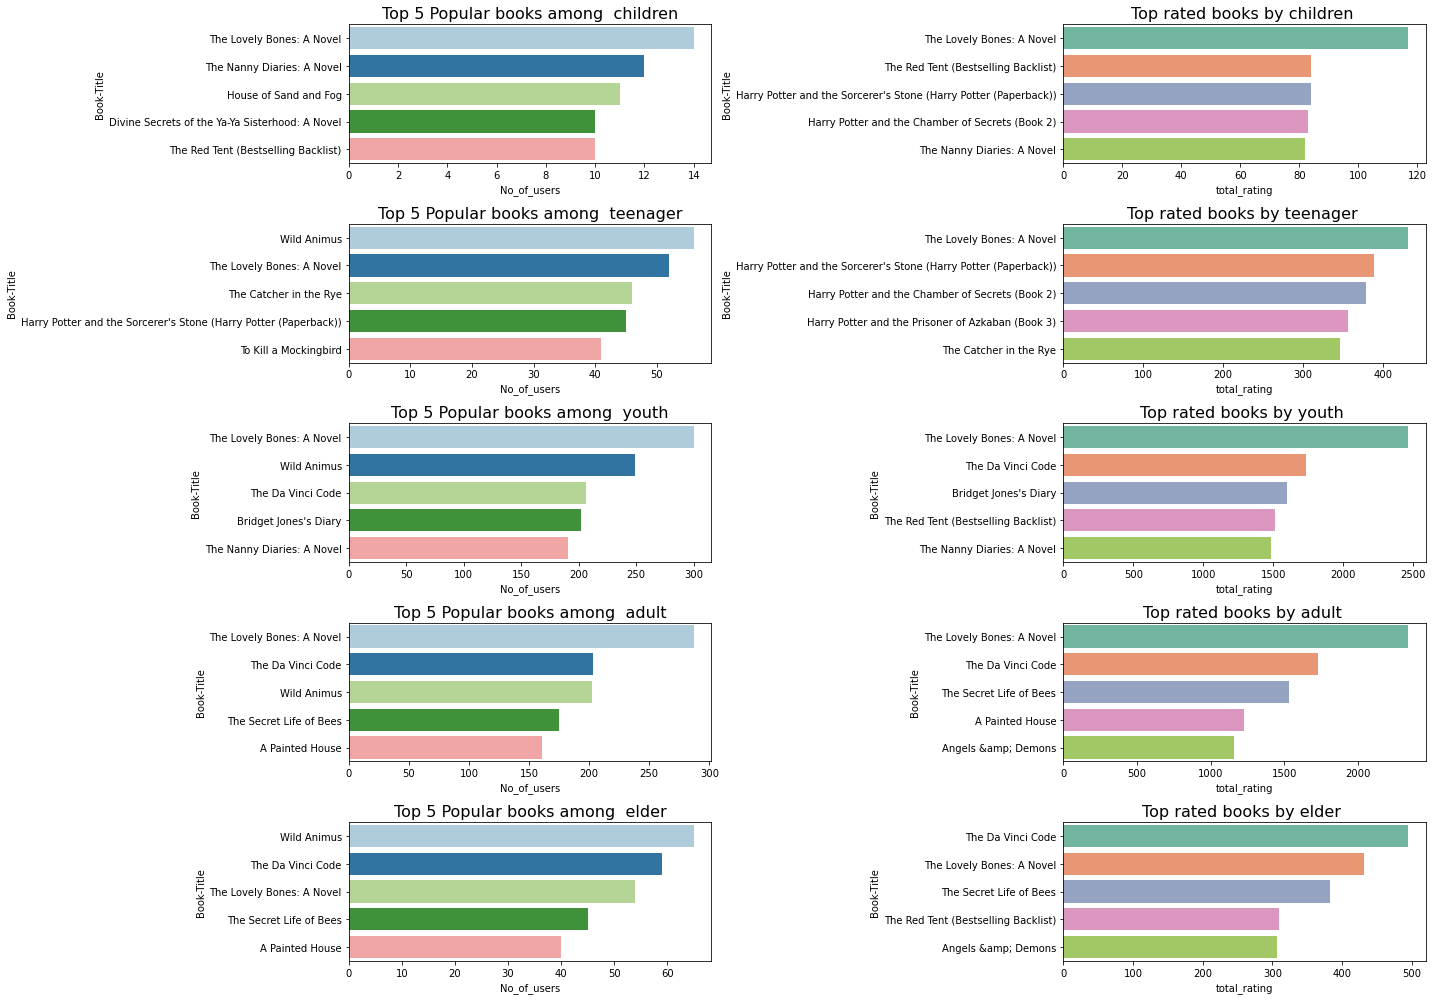

In [128]:
fig=plt.figure(figsize=(20,14))
i=1
for group  in ['children','teenager','youth','adult','elder']:
  age_df=main_dataset.loc[main_dataset['age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index() 
  plt.subplot(5,2,i)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book-Title',palette='Paired',data=age_df.head(5))
  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book-Title',palette='Set2',data=age_df.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1
  
plt.tight_layout()

# Model building

### Popularity based Recommendation System

In [129]:
ratings_books=ratings.merge(books,on='ISBN')
ratings_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [130]:
num_rating_df=ratings_books.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
237366,Ã?Â?lpiraten.,2
237367,Ã?Â?rger mit Produkt X. Roman.,4
237368,Ã?Â?sterlich leben.,1
237369,Ã?Â?stlich der Berge.,3


In [131]:
avg_rating_df = ratings_books.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
237366,Ã?Â?lpiraten.,0.000000
237367,Ã?Â?rger mit Produkt X. Roman.,5.250000
237368,Ã?Â?sterlich leben.,7.000000
237369,Ã?Â?stlich der Berge.,2.666667


In [132]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
237366,Ã?Â?lpiraten.,2,0.000000
237367,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
237368,Ã?Â?sterlich leben.,1,7.000000
237369,Ã?Â?stlich der Berge.,3,2.666667


In [133]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df

,Book-Title,num_ratings,avg_rating
78998,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
78986,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
79005,Harry Potter and the Sorcerer's Stone (Book 1),274,5.748175
78990,Harry Potter and the Order of the Phoenix (Boo...,346,5.488439
78978,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
188408,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
184186,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
79009,Harry Potter and the Sorcerer's Stone (Harry P...,571,4.900175
208134,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
216413,To Kill a Mockingbird,510,4.700000


In [134]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [152]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [135]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,274,5.748175
8,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,346,5.488439
11,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
14,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
15,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
24,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,571,4.900175
25,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
36,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


## Collaborative filtering recommendation system
### Item Based Recommendation System

In [136]:
x = ratings_books.groupby('User-ID').count()['Book-Rating'] > 200
users1 = x[x].index

In [137]:
filtered_rating = ratings_books[ratings_books['User-ID'].isin(users1)]

In [138]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [139]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)] = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1012371,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973.0,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1013543,269566,0670809381,0,Echoes,Maeve Binchy,1986.0,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1014387,271284,0440910927,0,The Rainmaker,John Grisham,1995.0,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1014676,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993.0,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [140]:
final_ratings.duplicated().sum()

0

In [141]:
pivot_table = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [142]:
pivot_table.fillna(0,inplace=True)
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
from sklearn.metrics.pairwise import cosine_similarity


In [144]:
similarity_scores = cosine_similarity(pivot_table)

In [145]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04402619],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14549498],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.11012672],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0200112 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.1081564 ],
       [0.04402619, 0.14549498, 0.11012672, ..., 0.0200112 , 0.1081564 ,
        1.        ]])

In [146]:
cosine_similarity(pivot_table).shape

(698, 698)

In [153]:
def recommend(book_name):
    # index fetch
    index = np.where(pivot_table.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pivot_table.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [155]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [151]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [156]:
pickle.dump(pivot_table,open('pivot_table.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))